In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [5]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']

object_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [10]:
for col in object_cols:
    print(col + ':', df[col].nunique())

CarName: 147
fueltype: 2
aspiration: 2
doornumber: 2
carbody: 5
drivewheel: 3
enginelocation: 2
enginetype: 7
cylindernumber: 7
fuelsystem: 8


In [11]:
df['CarBrand'] = df['CarName'].str.split(' ').str[0]

In [12]:
df['CarBrand'].value_counts()

CarBrand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [13]:
isuzu_cars = df[df['CarName'].str.contains('saab', case=False)]

isuzu_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0,saab
133,134,2,saab 99le,gas,std,four,sedan,fwd,front,99.1,...,mpfi,3.54,3.07,9.30,110,5250,21,28,12170.0,saab
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,mpfi,2.54,2.07,9.30,110,5250,21,28,15040.0,saab
135,136,2,saab 99gle,gas,std,four,sedan,fwd,front,99.1,...,mpfi,3.54,3.07,9.30,110,5250,21,28,15510.0,saab
136,137,3,saab 99gle,gas,turbo,two,hatchback,fwd,front,99.1,...,mpfi,3.54,3.07,9.00,160,5500,19,26,18150.0,saab
137,138,2,saab 99e,gas,turbo,four,sedan,fwd,front,99.1,...,mpfi,3.54,3.07,9.00,160,5500,19,26,18620.0,saab


In [14]:
df['CarBrand'] = df['CarBrand'].replace(['Nissan'], 'nissan')

In [15]:
df['CarBrand'].value_counts()

CarBrand
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

In [16]:
def reemplazar(x, y):
    df['CarBrand'] = df['CarBrand'].replace([x], y)

In [17]:
reemplazar('vw', 'volkswagen')

In [18]:
reemplazar('vokswagen', 'volkswagen')
reemplazar('toyouta', 'toyota')
reemplazar('maxda', 'mazda')
reemplazar('alfa-romero', 'alfa-romeo')

In [19]:
df['CarBrand'].value_counts()

CarBrand
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
isuzu          4
porsche        4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
porcshce       1
Name: count, dtype: int64

In [20]:
import seaborn as sns

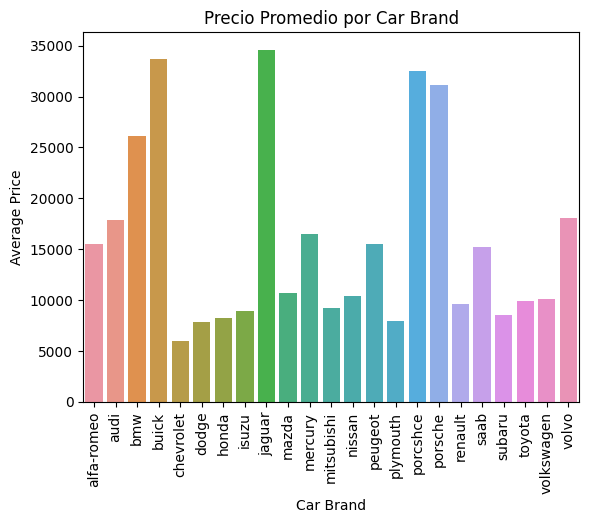

In [21]:
avg_prices = df.groupby('CarBrand')['price'].mean()

sns.barplot(
    x = avg_prices.index,
    y = avg_prices.values,  
    data=df
)

plt.title('Precio Promedio por Car Brand')
plt.xticks(rotation=90)
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.show()

En el grafico, podemos ver que las marcas de carro buick, jaguar, porsche, y bmw son las marcas con el precio promedio mas alto, lo cual nos indica que son marcas de lujo. Las marcas chevrolet, dodge, honda, plymouth, renault y subaru tienen los precios promedio mas bajos. 

In [22]:
avg_prices

CarBrand
alfa-romeo    15498.333333
audi          17859.166714
bmw           26118.750000
buick         33647.000000
chevrolet      6007.000000
dodge          7875.444444
honda          8184.692308
isuzu          8916.500000
jaguar        34600.000000
mazda         10652.882353
mercury       16503.000000
mitsubishi     9239.769231
nissan        10415.666667
peugeot       15489.090909
plymouth       7963.428571
porcshce      32528.000000
porsche       31118.625000
renault        9595.000000
saab          15223.333333
subaru         8541.250000
toyota         9885.812500
volkswagen    10077.500000
volvo         18063.181818
Name: price, dtype: float64

In [23]:
# carbody: 5
# enginetype: 7
# fuelsystem: 8
    
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [24]:
cylinder_map = {
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8,
    'two': 2,
    'three': 3,
    'twelve': 12
}

df['cylindernumber'] = df['cylindernumber'].replace(cylinder_map)
df['cylindernumber'] = pd.to_numeric(df['cylindernumber'])

/tmp/ipykernel_33/2219896057.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber'] = df['cylindernumber'].replace(cylinder_map)


In [25]:
door_map = {
    'four': 4,
    'two': 2
}

df['doornumber'] = df['doornumber'].replace(door_map)
df['doornumber'] = pd.to_numeric(df['doornumber'])

/tmp/ipykernel_33/1311490424.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace(door_map)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [27]:
# fueltype: 2
# aspiration: 2
# carbody: 5
# drivewheel: 3
# enginelocation: 2
# enginetype: 7
# fuelsystem: 8
replacement_dict = {'gas': 0, 'diesel': 1}

df['fueltype'] = df['fueltype'].replace(replacement_dict)

/tmp/ipykernel_33/3657201943.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fueltype'] = df['fueltype'].replace(replacement_dict)


In [28]:
replacement_dict = {'std': 0, 'turbo': 1}

df['aspiration'] = df['aspiration'].replace(replacement_dict)

/tmp/ipykernel_33/2188826347.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['aspiration'] = df['aspiration'].replace(replacement_dict)


In [29]:
replacement_dict = {'front': 0, 'rear': 1}

df['enginelocation'] = df['enginelocation'].replace(replacement_dict)

/tmp/ipykernel_33/1344832517.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['enginelocation'] = df['enginelocation'].replace(replacement_dict)


In [30]:
replacement_dict = {'fwd': 0, 'rwd': 1, '4wd':2}

df['drivewheel'] = df['drivewheel'].replace(replacement_dict)

/tmp/ipykernel_33/861591185.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['drivewheel'] = df['drivewheel'].replace(replacement_dict)


In [31]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,0,0,2,convertible,1,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,alfa-romero stelvio,0,0,2,convertible,1,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,1,0,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,audi 100 ls,0,0,4,sedan,0,0,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,0,0,4,sedan,2,0,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [32]:
columns_to_encode = ['carbody', 'enginetype', 'fuelsystem']

df_encoded = pd.get_dummies(df[columns_to_encode], drop_first=True)

df_encoded = df_encoded.astype(int)  

df = pd.concat([df.drop(columns_to_encode, axis=1), df_encoded], axis=1)

In [33]:
df.shape

(205, 41)

In [34]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,0,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,0,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,0,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,2,0,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df.dtypes

car_ID                 int64
symboling              int64
CarName               object
fueltype               int64
aspiration             int64
doornumber             int64
drivewheel             int64
enginelocation         int64
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
cylindernumber         int64
enginesize             int64
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
CarBrand              object
carbody_hardtop        int64
carbody_hatchback      int64
carbody_sedan          int64
carbody_wagon          int64
enginetype_dohcv       int64
enginetype_l           int64
enginetype_ohc         int64
enginetype_ohcf        int64
enginetype_ohcv        int64
enginetype_rotor       int64
fuelsystem_2bb

In [36]:
df.drop(columns = ['CarName', 'CarBrand'], inplace = True)

In [37]:
df.shape

(205, 39)

In [38]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,2,1,0,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
3,4,2,0,0,4,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,0,0,4,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [40]:
df.drop(columns = 'car_ID', inplace=True)

In [41]:
cars = np.array(df)

In [42]:
cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
        'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']

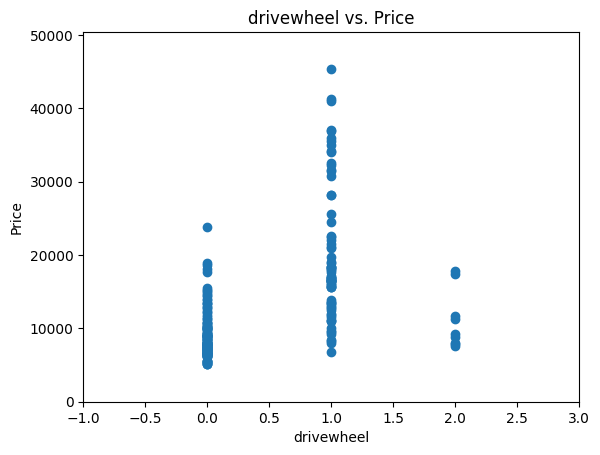

Correlation: 0.49073918813886663
P-Value: 8.036561937153515e-14 



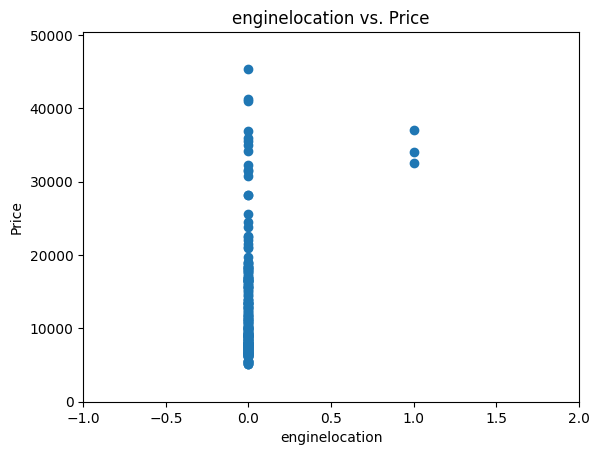

Correlation: 0.3249733010809561
P-Value: 1.9930196390573983e-06 



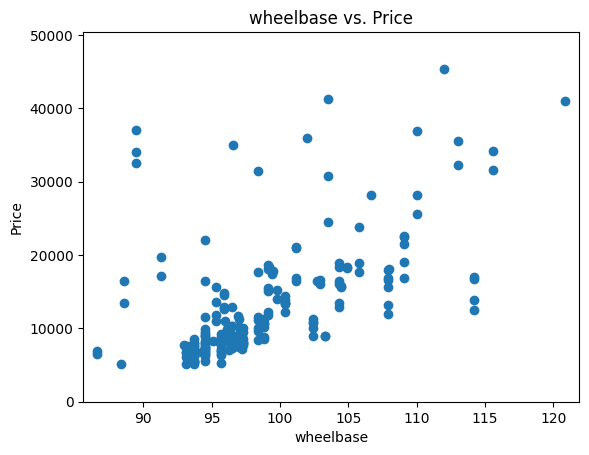

Correlation: 0.5778155982921501
P-Value: 1.182820486337694e-19 



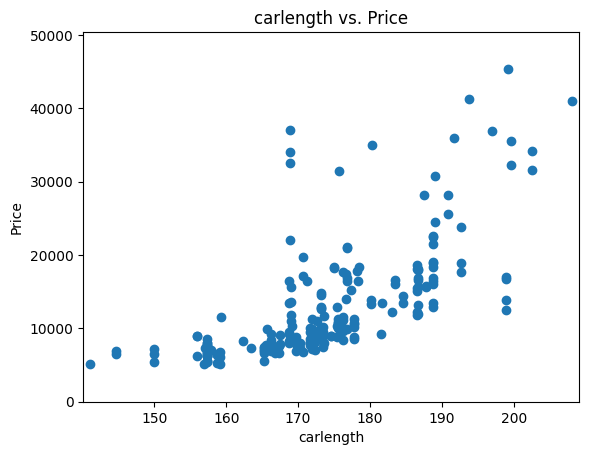

Correlation: 0.6829200156779621
P-Value: 1.6787066240745445e-29 



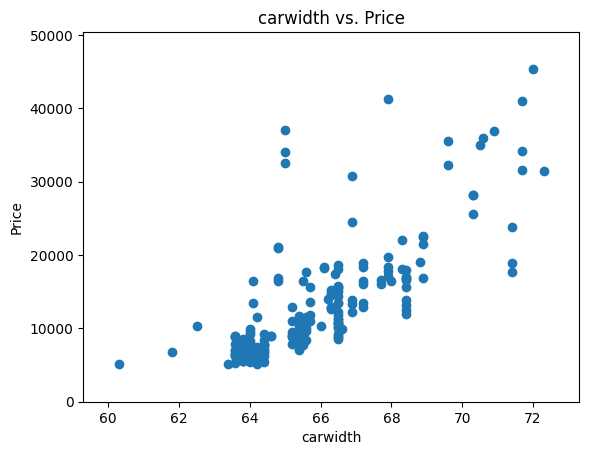

Correlation: 0.7593252997415115
P-Value: 9.627437876118924e-40 



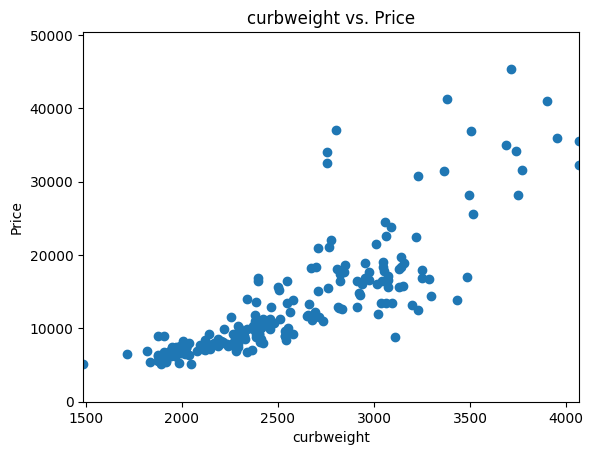

Correlation: 0.8353048793372968
P-Value: 1.2144448264030345e-54 



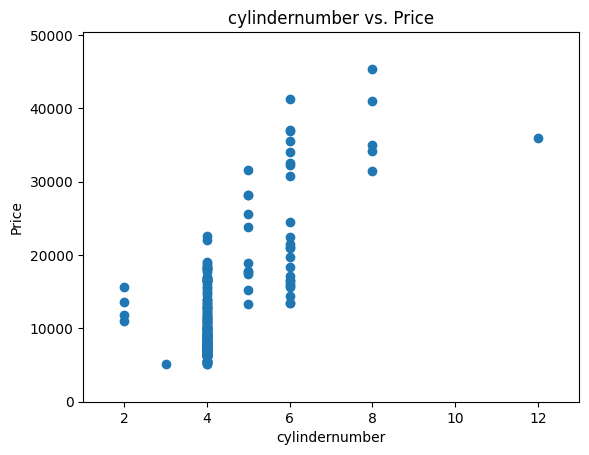

Correlation: 0.7183049020002832
P-Value: 8.028863372444576e-34 



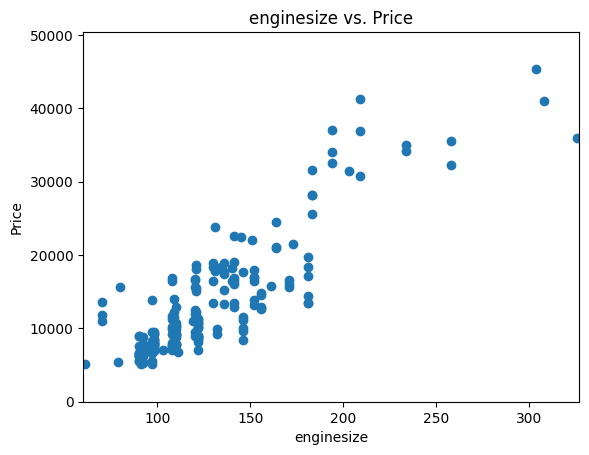

Correlation: 0.8741448025245117
P-Value: 1.3547637598648963e-65 



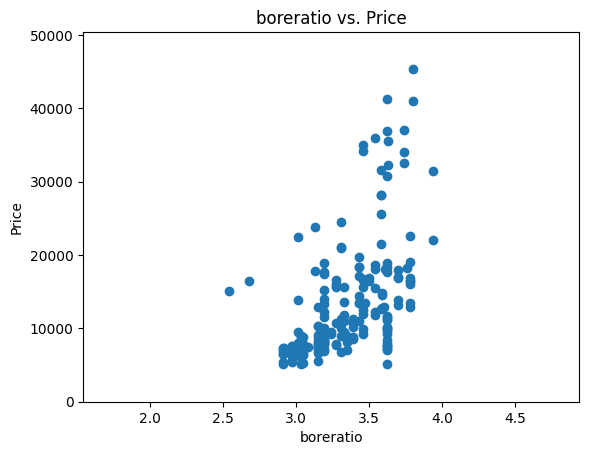

Correlation: 0.5531732367984437
P-Value: 7.907922278248891e-18 



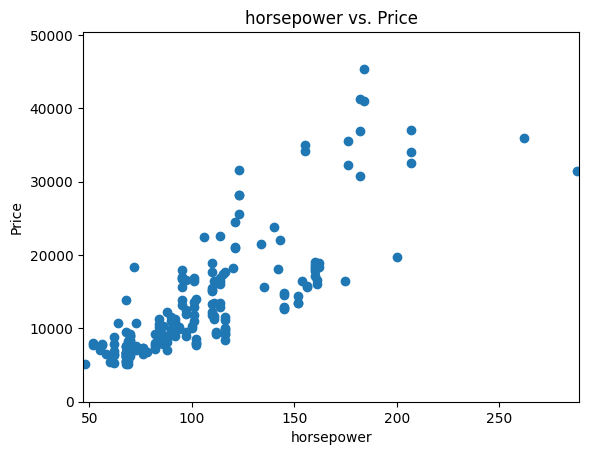

Correlation: 0.8081388225362216
P-Value: 1.4834365732940885e-48 



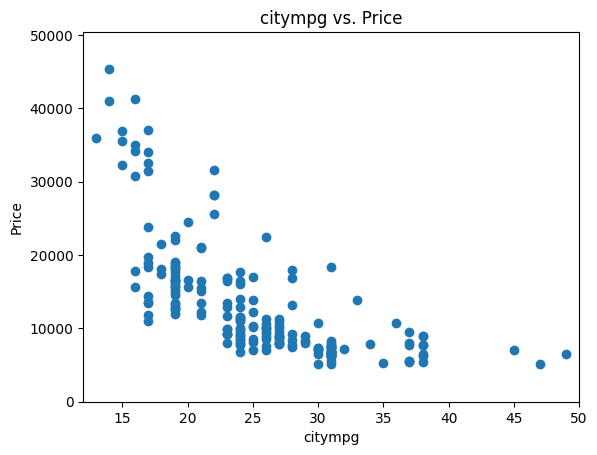

Correlation: -0.6857513360270397
P-Value: 7.978684249663508e-30 



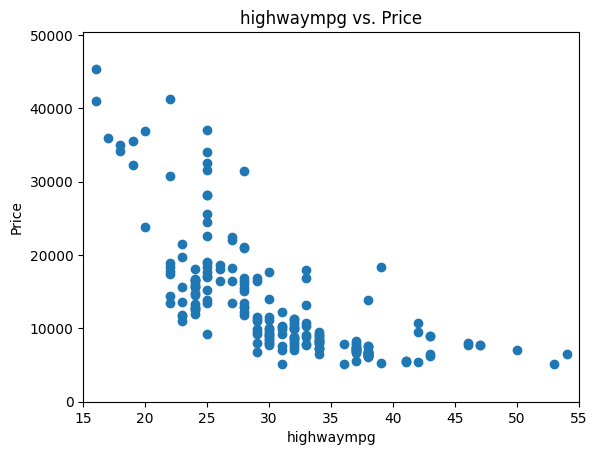

Correlation: -0.6975990916465562
P-Value: 3.230681380364674e-31 



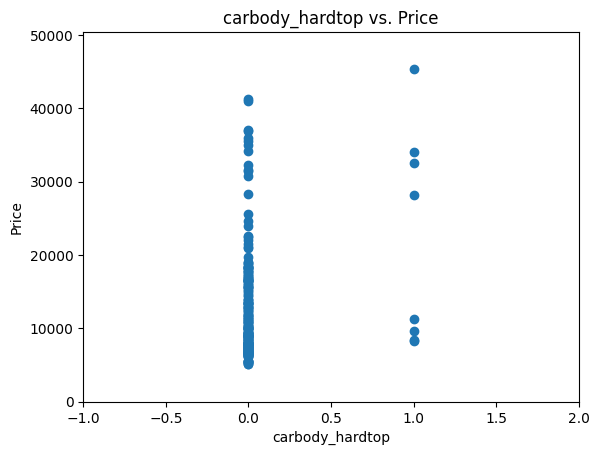

Correlation: 0.2258540119105489
P-Value: 0.0011293790556444663 



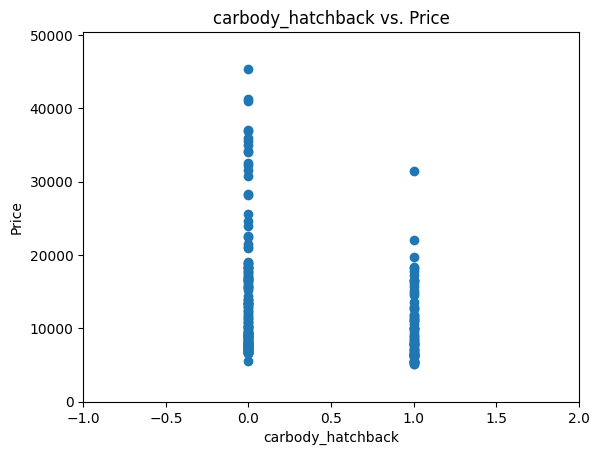

Correlation: -0.2620392214226013
P-Value: 0.00014739114011896398 



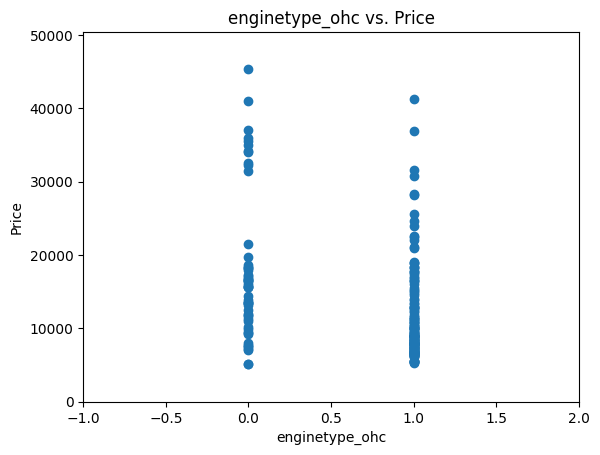

Correlation: -0.3442701459263224
P-Value: 4.317008608019637e-07 



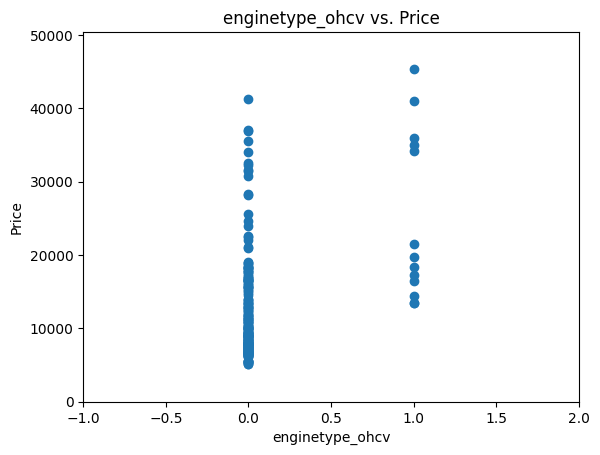

Correlation: 0.38599128174519975
P-Value: 1.0917512822386352e-08 



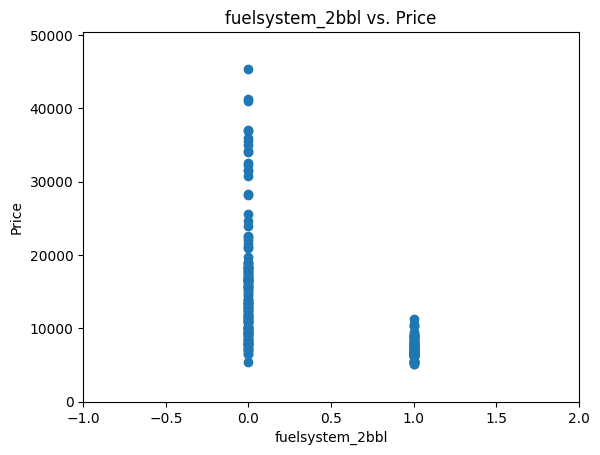

Correlation: -0.5013743424965749
P-Value: 1.9017550057375154e-14 



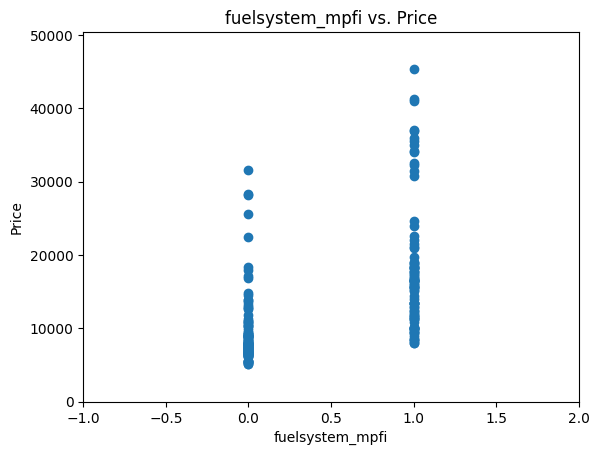

Correlation: 0.5170749892680735
P-Value: 2.0629264446774025e-15 



In [43]:
for col in cols:
    
    y_min = 0
    y_max = df['price'].max() + 5000
    
    x_min = df[col].min() - 1
    x_max = df[col].max() + 1
    
    correlation, pvalue = pearsonr(df[col], df['price'])
    
    if correlation < -0.2:
        plt.scatter(df[col], df['price'])
        plt.gca().set_autoscale_on(False)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title(col + ' vs. Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()
        print('Correlation:', correlation)
        print('P-Value:', pvalue, '\n')

    elif correlation > 0.2:
        plt.scatter(df[col], df['price'])
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title(col + ' vs. Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()
        print('Correlation:', correlation)
        print('P-Value:', pvalue, '\n')
        
    else:
        continue

En los graficos arriba podemos ver que enginesize es la caracteristica con mas correlacion con nuestra columna objetivo (Price). Horsepower y enginesize tambien tienen una correlacion positiva muy fuerte con price. 

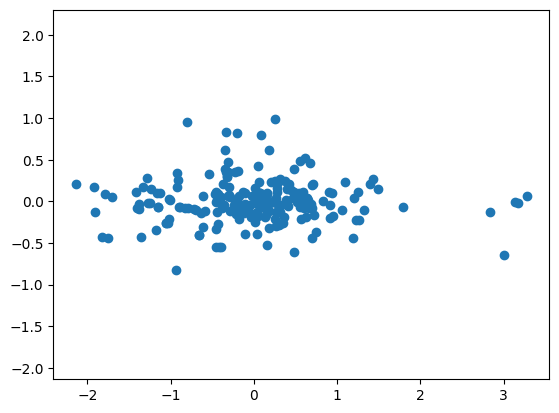

Display the correlation:  5.984795992119984e-17


In [65]:
model = PCA()

pca_features = model.fit_transform(cars)

xs = pca_features[:,12] # enginesize
ys = pca_features[:,20] # price

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs, ys)

print("Display the correlation: ",correlation)

Aqui vemos la data descorrelacionada, estas son las columnas de precio y enginesize que tenian una correlacion de 0.87 y aqui vemos como la correlacion no se puede ver en el grafico.

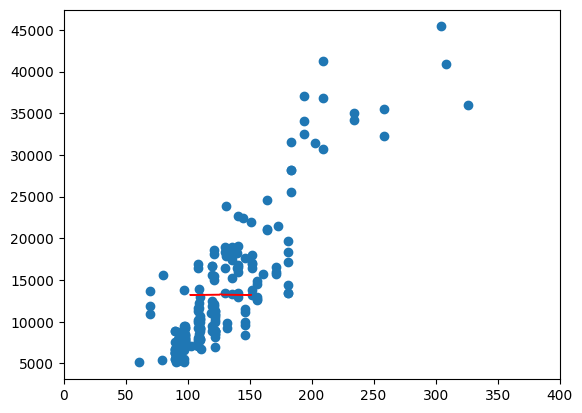

In [99]:
plt.scatter(cars[:,12], cars[:,20])

model = PCA()
model.fit(cars)
mean = model.mean_
first_pc = model.components_[0,:]

plt.arrow(mean[12], mean[20], first_pc[12], first_pc[20], color='red', 
          length_includes_head = True, width = 2, head_width = 50, head_length = 50)
plt.xlim(0,400)
#plt.axis('equal')
plt.show()

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

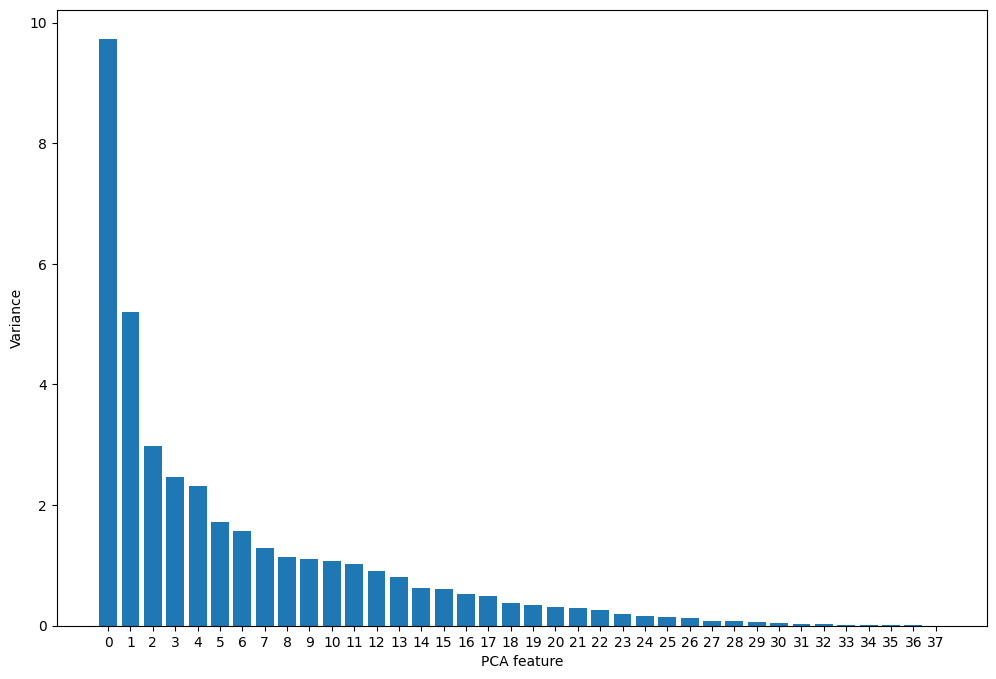

In [47]:
scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler,pca)
pipeline.fit(cars)

features = range(pca.n_components_)

plt.figure(figsize=(12, 8))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

Aqui vemos que los PCA features 0 y 1 son son los que mayor varianza tienen, las 2, 3 y 4 tambien tienen bastante varianza, por lo cual decidi utilizar 4 n componentes.

In [48]:
n_components = 4

pca = PCA(n_components=n_components)
pca.fit(df)

pca_features = pca.transform(df)
print(pca.explained_variance_ratio_)

[9.95201437e-01 3.74154931e-03 1.04447934e-03 8.33905663e-06]


In [49]:
n_components = 4

pca = PCA(n_components=n_components)
pca.fit(df.drop('price', axis = 1))

PCA(n_components=4)

In [50]:
new_features_df = pd.DataFrame(pca_features, columns=[f"PC{i+1}" for i in range(n_components)])

df_pca = pd.concat([new_features_df, df['price']], axis=1)

In [51]:
df_pca.head()

,PC1,PC2,PC3,PC4,price
0,218.225938,-112.778732,54.488969,10.472469,13495.0
1,3218.672720,-50.308988,207.159044,-0.558264,16500.0
2,3233.921217,-130.013393,-57.481793,34.729761,16500.0
3,658.358512,436.243176,134.079009,-11.518296,13950.0
4,4179.747181,367.329938,-153.941060,-16.936537,17450.0


In [52]:
df_pca.shape

(205, 5)

# Modelo Regresion Lineal

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df_pca.drop(columns = 'price')
y = df_pca['price']

X.columns = [None] * len(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [56]:
rlm = LinearRegression()
rlm.fit(X_train, y_train)

LinearRegression()

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

In [101]:
y_pred_train = rlm.predict(X_train)
y_pred = rlm.predict(X_test)

# EAM
eam_testing = mean_absolute_error(y_test, y_pred)
eam_train = mean_absolute_error(y_train, y_pred_train)
print(f"\nError Absoluto Medio (Testing Set): {np.round(eam_testing,4) }")
print(f"Error Absoluto Medio (Training Set): {np.round(eam_train,4) }")

# MAPE
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
print(f"\nError Porcentual Absoluto Medio (Testing Set): {mape_train:.10f}")
print(f"Error Porcentual Absoluto Medio (Training): {mape_test:.10f}")


Error Absoluto Medio (Testing Set): 0.0107
Error Absoluto Medio (Training Set): 0.0111

Error Porcentual Absoluto Medio (Testing Set): 0.0000009197
Error Porcentual Absoluto Medio (Training): 0.0000008896


# Conclusiones

El modelo de regresion lineal nos dio extremadamente preciso a la hora de predecir el precio de carros, aqui vemos que el error absoluto medio de nuestro testing set es de 0.0107 lo cual esta extremadamente bajo y nos indica que el modelo es muy preciso prediciendo el precio de un carro con los 4 Principal Components.

In [61]:
slopes = rlm.coef_
_int = rlm.intercept_

print('Slopes:', slopes, '\nIntercept:', _int)

Slopes: [ 0.99848494  0.02078794  0.05080574 -0.00365647] 
Intercept: 13276.710898798978


In [62]:
def regression (row_index):
    return (_int
            + slopes[0] *  df_pca.iloc[row_index,0] 
            + slopes[1] * df_pca.iloc[row_index,1] 
            +  slopes[2] * df_pca.iloc[row_index,2] 
            + slopes[3] * df_pca.iloc[row_index,3])

In [63]:
reg_result = regression(2)

print(reg_result)

16499.982415154638
